### Creating Plots for the Watertank case study

First import all required libraries

In [4]:
import matplotlib.pylab as plt
import numpy as np

Read in data from file. We assume that each line in the file contains a sequence of Boolean values, all sequences are expected to have the same length. For a fixed window-size we compute the number of occurrences of "1", i.e., the number of cases per window in which the base controller was invoked.

In [5]:
window = 10

# open file
file = open("baseControllerInvocations", 'r')

# read in files
invocations = []
for line in file:
    # filter out empty strings
    str_list = list(filter(None, line.split(",")))
    invocations.append(str_list)


numberClusters = int(len(invocations[0])/window) + (len(invocations[0]) % window > 0)
frequencies = []
average = [0 for i in range(numberClusters)]
for i in range(len(invocations)):
    frequencies.append([])
    
    for j in range(numberClusters):
        frequencies[i].append(invocations[i][j*window : (j+1)*window].count('1'))
        average[j] = average[j] + frequencies[i][j]/len(invocations)
        #print("add frequency " + str(frequencies[i][j]) + " which contributes by " + str(average[j]) + " to the average.")
   

Use matplotlib to visualize the results

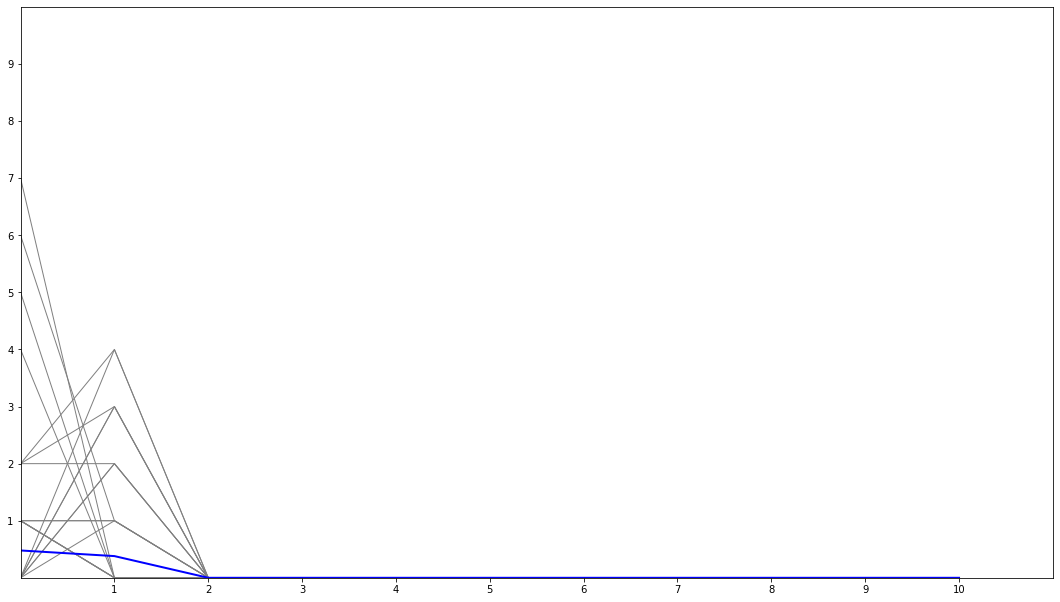

In [6]:
#plt.style.use('_mpl-gallery')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)

for i in range(len(frequencies)):
    ax.plot(range(len(frequencies[i])), frequencies[i], linewidth=1.0, color="gray")
    
ax.plot(range(len(average)), average, linewidth=2.0, color="blue")

ax.set(xlim=(0, len(frequencies[0])), xticks=np.arange(1, len(frequencies[0])), ylim=(0, window), yticks=np.arange(1, window))

plt.show()